<a href="https://colab.research.google.com/github/bhavyapriyadarshini/face_mask_detection/blob/main/Face_mask_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:06<00:00, 31.2MB/s]
100% 163M/163M [00:06<00:00, 27.8MB/s]


In [ ]:

# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**IMPORTING THE DEPENDENCIES**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_11.jpg', 'with_mask_1044.jpg', 'with_mask_2349.jpg', 'with_mask_3247.jpg', 'with_mask_3009.jpg']
['with_mask_2723.jpg', 'with_mask_1573.jpg', 'with_mask_1496.jpg', 'with_mask_3158.jpg', 'with_mask_913.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1436.jpg', 'without_mask_406.jpg', 'without_mask_3828.jpg', 'without_mask_1123.jpg', 'without_mask_3516.jpg']
['without_mask_126.jpg', 'without_mask_3684.jpg', 'without_mask_2094.jpg', 'without_mask_3410.jpg', 'without_mask_950.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

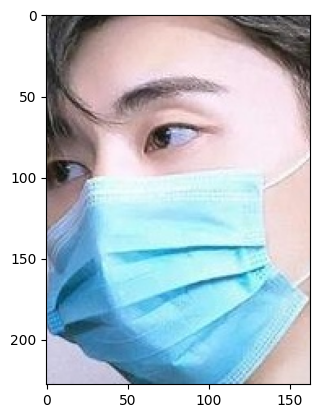

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

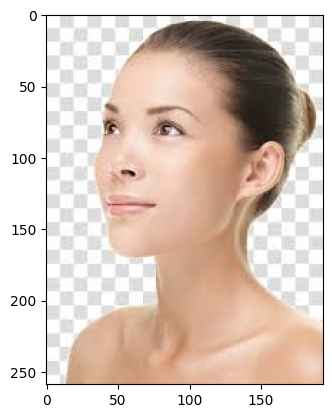

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

Resize the Images

Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[226, 216, 227],
        [227, 217, 228],
        [227, 217, 228],
        ...,
        [ 36,  31,  29],
        [ 42,  36,  35],
        [ 51,  47,  43]],

       [[226, 216, 227],
        [226, 216, 227],
        [225, 215, 226],
        ...,
        [ 39,  34,  31],
        [ 44,  39,  36],
        [ 51,  47,  43]],

       [[225, 215, 226],
        [225, 215, 226],
        [224, 214, 225],
        ...,
        [ 38,  33,  30],
        [ 41,  36,  33],
        [ 49,  44,  41]],

       ...,

       [[ 26,  24,  35],
        [ 26,  24,  33],
        [ 24,  23,  31],
        ...,
        [ 52,  50,  51],
        [ 53,  51,  52],
        [ 52,  50,  51]],

       [[ 26,  24,  35],
        [ 25,  24,  33],
        [ 25,  24,  32],
        ...,
        [ 50,  48,  49],
        [ 51,  49,  50],
        [ 52,  50,  51]],

       [[ 26,  24,  35],
        [ 26,  25,  34],
        [ 26,  25,  33],
        ...,
        [ 51,  49,  50],
        [ 52,  50,  51],
        [ 52,  50,  51]]], dtype=uint8)
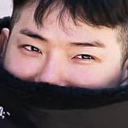

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[190,  90,  24],
        [167,  62,  11],
        [134,  44,  11],
        ...,
        [ 48,  31,  19],
        [ 46,  28,  14],
        [ 39,  22,   7]],

       [[191,  89,  21],
        [170,  65,  13],
        [129,  41,   7],
        ...,
        [ 39,  23,  10],
        [ 43,  25,  10],
        [ 47,  29,  14]],

       [[193,  91,  21],
        [169,  67,  13],
        [127,  44,   8],
        ...,
        [ 36,  22,   8],
        [ 37,  19,   5],
        [ 48,  27,  12]],

       ...,

       [[198, 191, 161],
        [195, 189, 158],
        [192, 185, 153],
        ...,
        [233, 205, 164],
        [231, 204, 157],
        [231, 205, 155]],

       [[201, 193, 165],
        [199, 192, 163],
        [197, 190, 160],
        ...,
        [229, 200, 149],
        [227, 198, 145],
        [227, 199, 143]],

       [[202, 196, 167],
        [201, 195, 166],
        [201, 194, 165],
        ...,
        [224, 194, 133],
        [221, 191, 132],
        [220, 191, 134]]], dtype=uint8)
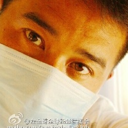

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.74509804, 0.35294118, 0.09411765],
        [0.65490196, 0.24313725, 0.04313725],
        [0.5254902 , 0.17254902, 0.04313725],
        ...,
        [0.18823529, 0.12156863, 0.0745098 ],
        [0.18039216, 0.10980392, 0.05490196],
        [0.15294118, 0.08627451, 0.02745098]],

       [[0.74901961, 0.34901961, 0.08235294],
        [0.66666667, 0.25490196, 0.05098039],
        [0.50588235, 0.16078431, 0.02745098],
        ...,
        [0.15294118, 0.09019608, 0.03921569],
        [0.16862745, 0.09803922, 0.03921569],
        [0.18431373, 0.11372549, 0.05490196]],

       [[0.75686275, 0.35686275, 0.08235294],
        [0.6627451 , 0.2627451 , 0.05098039],
        [0.49803922, 0.17254902, 0.03137255],
        ...,
        [0.14117647, 0.08627451, 0.03137255],
        [0.14509804, 0.0745098 , 0.01960784],
        [0.18823529, 0.10588235, 0.04705882]],

       ...,

       [[0.77647059, 0.74901961, 0.63137255],
        [0.76470588, 0.74117647, 0.61960784],
        [0.75294118, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:

import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 179s 1s/step - loss: 0.5246 - acc: 0.7703 - val_loss: 0.3870 - val_acc: 0.8083
Epoch 2/5
170/170 [==============================] - 133s 782ms/step - loss: 0.2943 - acc: 0.8849 - val_loss: 0.2961 - val_acc: 0.8843
Epoch 3/5
170/170 [==============================] - 139s 819ms/step - loss: 0.2469 - acc: 0.9034 - val_loss: 0.2628 - val_acc: 0.8975
Epoch 4/5
170/170 [==============================] - 135s 794ms/step - loss: 0.2042 - acc: 0.9250 - val_loss: 0.2474 - val_acc: 0.9107
Epoch 5/5
170/170 [==============================] - 135s 793ms/step - loss: 0.1630 - acc: 0.9415 - val_loss: 0.2613 - val_acc: 0.9091


**Model Evaluation**

In [ ]:
model.save("face-mask-detection.h5")

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 217ms/step - loss: 0.1889 - acc: 0.9272
Test Accuracy = 0.9272005558013916


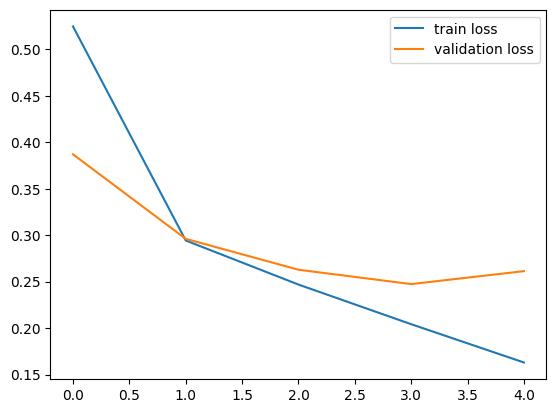

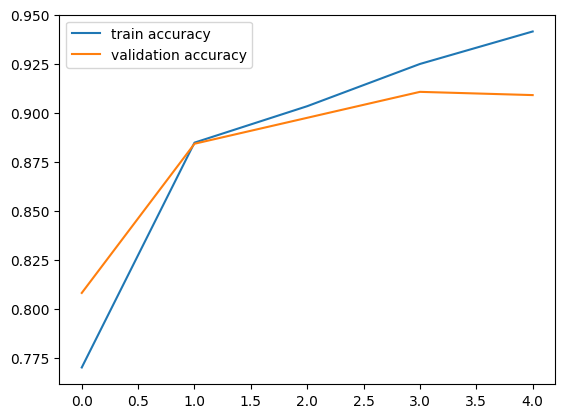

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255.0

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

input_pred_label = input_pred_label.astype(int)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255.0

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

input_pred_label = input_pred_label.astype(int)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')